In [1]:
import pandas as pd
import numpy as np

In [2]:
comp = pd.read_csv(r'C:\Users\dell\Downloads\Fraud_check.csv')
comp

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <a list of 10 Patch objects>)

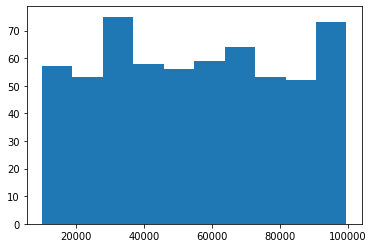

In [3]:
import matplotlib.pyplot as plt
plt.hist(comp['Taxable.Income'])

In [4]:
comp.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
comp.rename(columns = {'Taxable.Income':'Taxable_Income'}, inplace = True)
comp.rename(columns = {'Marital.Status':'Marital_Status'}, inplace = True)

In [6]:
comp.loc[comp.Taxable_Income <= 30000,"Taxable_Income"]=0
comp.loc[comp.Taxable_Income > 30000,"Taxable_Income"]=1
comp

,Undergrad,Marital_Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [7]:
comp = pd.concat([comp.drop('Urban', axis=1), pd.get_dummies(comp['Urban'])], axis=1)
comp = pd.concat([comp.drop('Undergrad', axis=1), pd.get_dummies(comp['Undergrad'])], axis=1)
comp = pd.concat([comp.drop('Marital_Status', axis=1), pd.get_dummies(comp['Marital_Status'])], axis=1)

In [8]:
comp.columns = ['Taxable_Income','City.Population', 'Work.Experience', 'NO', 'YES', 'NO1', 'YES1',
       'Divorced', 'Married', 'Single']

In [9]:
comp

,Taxable_Income,City.Population,Work.Experience,NO,YES,NO1,YES1,Divorced,Married,Single
0,1,50047,10,0,1,1,0,0,0,1
1,1,134075,18,0,1,0,1,1,0,0
2,1,160205,30,0,1,1,0,0,1,0
3,1,193264,15,0,1,0,1,0,0,1
4,1,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,0,1,1,0,0
596,1,55369,2,0,1,0,1,1,0,0
597,1,154058,0,0,1,1,0,1,0,0
598,1,180083,17,1,0,0,1,0,1,0


In [10]:
x=comp.drop(['Taxable_Income'],axis='columns')
y=comp.Taxable_Income

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [12]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(480, 9)
(480,)
(120, 9)
(120,)


In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns)

In [17]:
y_pred = dt.predict(test_x)

In [19]:
species = np.array(test_y)
predictions = np.array(y_pred)
confusion_matrix(species, predictions)

array([[ 8, 19],
       [19, 74]], dtype=int64)

In [20]:
accuracy=(74+8)/100

In [21]:
accuracy

0.82